In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
stations = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#print all the dates from measurement
p = session.query(measurement.date,measurement.prcp).\
    order_by(measurement.date.desc()).all()
p

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [21]:
#this tells me that 8/23/2017 is the most recent line of data.
#now narrow the results to only that from the last 12 months
#current_data = dt.timedelta(days=365) - dt.date(2017, 8, 23) 
#kept getting unsupported operand types(s) becasue I was trying to subtract the most
#recent date from the timedelta.
#link to help solving this issue -- https://docs.python.org/3/library/datetime.html
current_data = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [22]:
# Perform a query to retrieve the data and precipitation scores
rain = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > current_data).\
    order_by(measurement.date).all()

In [24]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(rain, columns=["Date", "Percipitation"])
#Test DF to make sure it is only the last year
measurement_df.head()

,Date,Percipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [26]:
# Sort the dataframe by date
measurement_clean_df = measurement_df
measurement_clean_df = measurement_clean_df.sort_values(["Date"], ascending=True)
#Test showed that I had already created it in such a way that it was ascending
measurement_clean_df.head()

,Date,Percipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


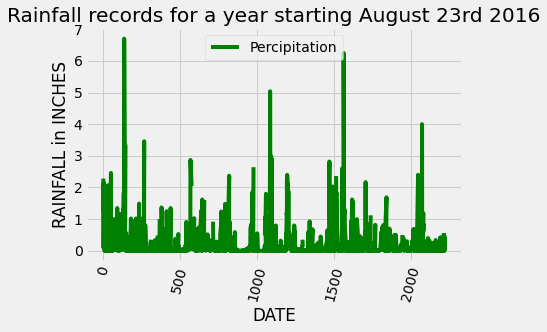

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_clean_df.plot(rot=75, color='green')
plt.xlabel("DATE")
plt.ylabel("RAINFALL in INCHES")
plt.title("Rainfall records for a year starting August 23rd 2016")
plt.show()
#couldnt remember where in the code to change color so link to the documentation for color change is below.
#https://www.codespeedy.com/how-to-change-line-color-in-matplotlib/

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_clean_df.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to show how many stations are available in this dataset?
available = session.query(func.count(stations.station)).all()
available

[(9)]

In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
highest_activity = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
highest_activity
#naming the staitons query plural was a mistake

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#MOST ACTIVE IS FIRST BECAUSE DESCENDING-- 2772 --
session.query(func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

# filter(measurement.id == '2772').all()
# It says to use ID but when I use ID I only get 63 acrosss the board so I had to use sation to get reliable data.

[(85.0, 54.0, 71.66378066378067)]

In [68]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 

#copy pasta'd rain query from above and just made appropiate adjustments to replace date with tobs
#then add a filter for the station but still keep the date filter so it still holds the last 12 months

final = session.query(measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date > current_data).all()
final_df = pd.DataFrame(final, columns=["tobs"])

In [ ]:
# and plot the results as a histogram


## Bonus Challenge Assignment
## TO DO AT A LATER DATE

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
